In [1]:
pip install numpy pandas matplotlib seaborn opencv-python scikit-learn tensorflow


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Dance Form.zip to Dance Form.zip


In [5]:
import zipfile
import os

# Replace with exact uploaded file name if needed
zip_path = "Dance Form.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Check extracted contents
os.listdir("dataset")


['train.csv', 'train', 'test', 'test.csv']

In [6]:
import pandas as pd

In [8]:
train_df=pd.read_csv('dataset/train.csv')
test_df=pd.read_csv('dataset/test.csv')

print(train_df.head())

     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi


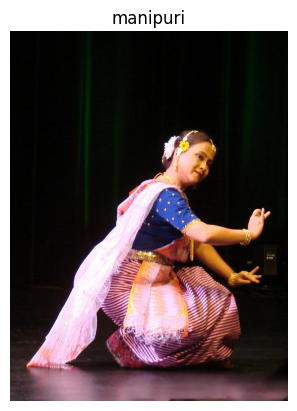

In [21]:
import matplotlib.pyplot as plt
import cv2
img_path=os.path.join("dataset/train",train_df['Image'][87])
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(train_df['target'][87])
plt.axis('off')
plt.show()

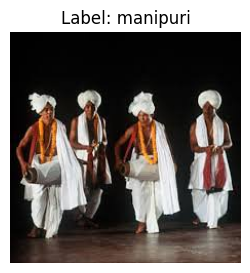

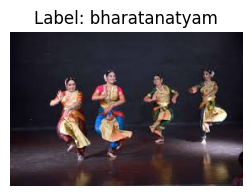

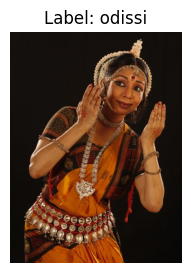

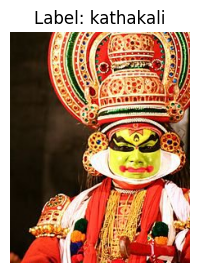

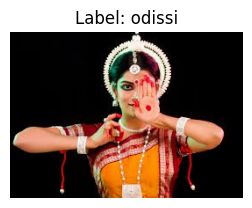

In [22]:
import matplotlib.pyplot as plt
import cv2
import os

# Loop over first 5 rows in train_df
for i in range(5):
    img_name = train_df.iloc[i]['Image']
    label = train_df.iloc[i]['target']

    img_path = os.path.join("dataset/train", img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


In [23]:
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

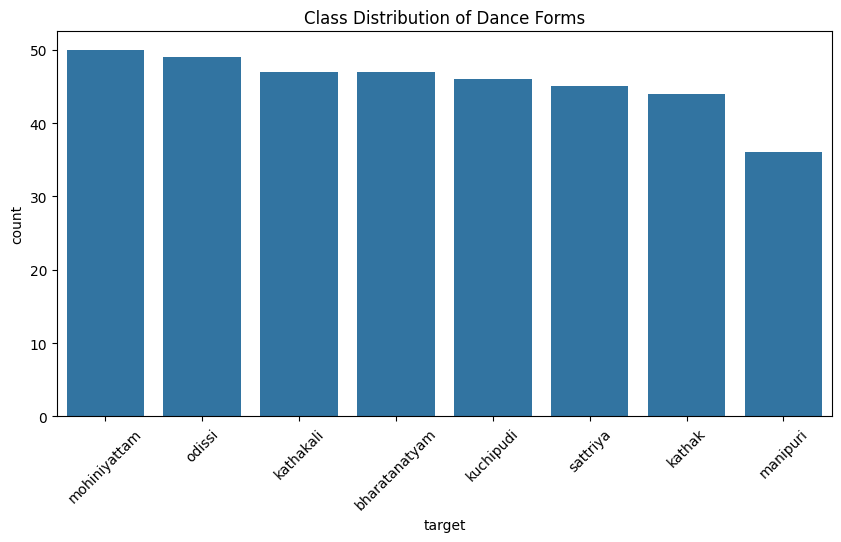

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='target', order=train_df['target'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution of Dance Forms")
plt.show()


One image per class

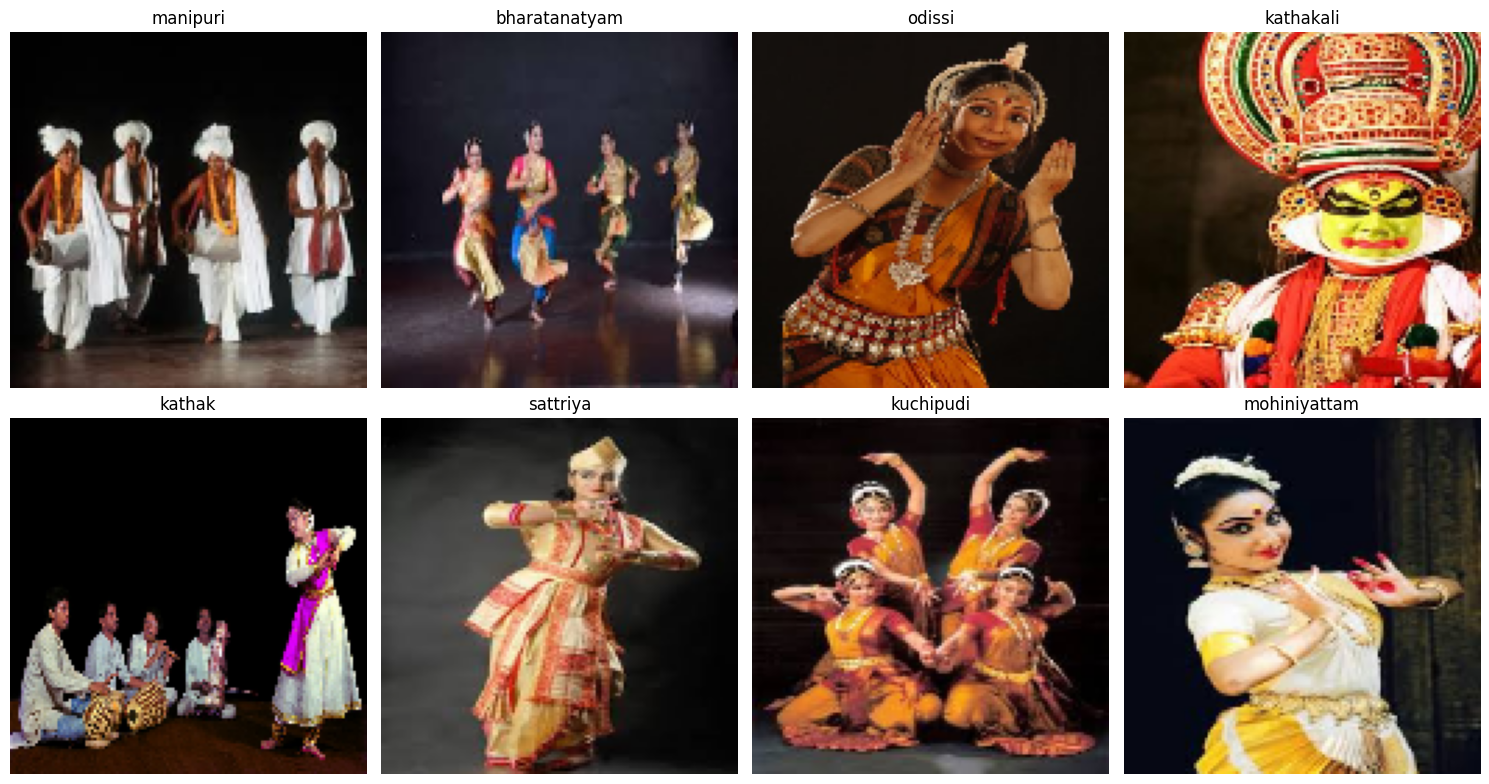

In [26]:
unique_class=train_df['target'].unique()
plt.figure(figsize=(15, 8))

for i,dance_form in enumerate(unique_class):
  sample=train_df[train_df['target']==dance_form].iloc[0]
  img_path=os.path.join("dataset/train",sample['Image'])
  img=cv2.imread(img_path)
  img=cv2.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(128,128))
  plt.subplot(2,4,i+1)
  plt.imshow(img)
  plt.title(dance_form)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
import numpy as np
from re import X
IMG_SIZE=128
label_map={label:idx for idx,label in enumerate(sorted(train_df['target'].unique()))}

X,y=[],[]

for idx,row in train_df.iterrows():
  img_path=os.path.join("dataset/train",row['Image'])
  img=cv2.imread(img_path)
  img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  img=img/255.0
  X.append(img)
  y.append(label_map[row['target']])

X=np.array(X)
y=to_categorical(np.array(y),num_classes=8)

In [29]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(8,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,352 (28.20 MB)

 Trainable params: 7,393,352 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=15,batch_size=32)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.1068 - loss: 2.6982 - val_accuracy: 0.1781 - val_loss: 2.0570
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2387 - loss: 2.0336 - val_accuracy: 0.3151 - val_loss: 1.9744
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4288 - loss: 1.8014 - val_accuracy: 0.3836 - val_loss: 1.7861
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5490 - loss: 1.4859 - val_accuracy: 0.3973 - val_loss: 1.8141
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8005 - loss: 0.8873 - val_accuracy: 0.4247 - val_loss: 1.6051
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8187 - loss: 0.6143 - val_accuracy: 0.4110 - val_loss: 1.7506
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9232 - loss: 0.2854 - val_accuracy: 0.4932 - val_loss: 1.7839
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9349 - loss: 0.2672 - val_accuracy: 0.4932 -

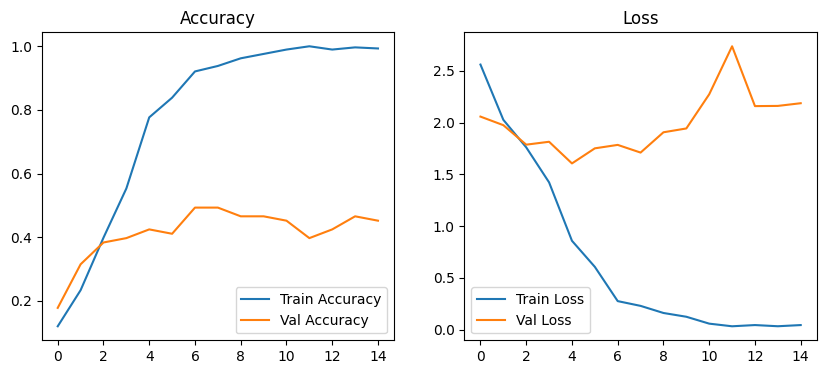

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


Overfitting occurs when:

Dataset is small (yours has only 364 images)

Model is too complex for small data

No regularization or augmentation

add data augmentation

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

datagen.fit(X_train)

# Then use this in model.fit
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=30)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.7165 - loss: 0.7883 - val_accuracy: 0.5890 - val_loss: 1.4877
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7722 - loss: 0.7031 - val_accuracy: 0.4521 - val_loss: 1.6880
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7212 - loss: 0.7739 - val_accuracy: 0.5068 - val_loss: 1.9099
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7321 - loss: 0.7808 - val_accuracy: 0.5753 - val_loss: 1.6075
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7595 - loss: 0.6391 - val_accuracy: 0.5890 - val_loss: 1.4459
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8361 - loss: 0.5486 - val_accuracy: 0.5479 - val_loss: 1.6474
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7486 - loss: 0.6436 - val_accuracy: 0.5753 - val_loss: 1.5187
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8225 - loss: 0.5140 - val_accuracy: 0.

Mobilenetv2
pretreained model


In [37]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
IMG_SIZE = 224  # MobileNetV2 expects 224x224

# Resize and preprocess using MobileNetV2's preprocessing
def preprocess_images(df, folder):
    images = []
    labels = []
    for idx, row in df.iterrows():
        img_path = os.path.join(folder, row['Image'])
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = preprocess_input(img)
        images.append(img)
        labels.append(label_map[row['target']])
    return np.array(images), to_categorical(np.array(labels), num_classes=8)

X, y = preprocess_images(train_df, "dataset/train")

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [39]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()  # No augmentation for validation


In [40]:
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

base_model.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.3)(x)
predictions=Dense(8,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=val_datagen.flow(X_val, y_val),
    epochs=15
)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1834 - loss: 2.5166 - val_accuracy: 0.2466 - val_loss: 1.9379
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.2245 - loss: 1.9874 - val_accuracy: 0.4247 - val_loss: 1.7043
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.3163 - loss: 1.8256 - val_accuracy: 0.5205 - val_loss: 1.5568
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.4293 - loss: 1.6380 - val_accuracy: 0.6438 - val_loss: 1.4044
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.4798 - loss: 1.6096 - val_accuracy: 0.6575 - val_loss: 1.2777
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.4525 - loss: 1.5210 - val_accuracy: 0.7123 - val_loss: 1.1519
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.6055 - loss: 1.2907 - val_accuracy: 0.7260 - val_loss: 1.0721
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.6175 - loss: 1.2149 - val_accuracy: 0.68

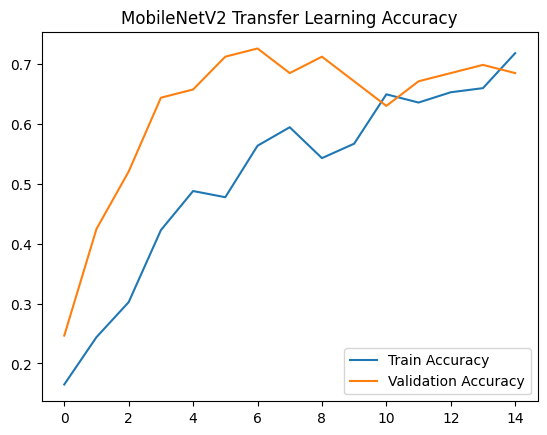

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("MobileNetV2 Transfer Learning Accuracy")
plt.show()


In [43]:
# Load test images
X_test = []
for img_name in test_df['Image']:
    img_path = os.path.join("dataset/test", img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = preprocess_input(img)
    X_test.append(img)

X_test = np.array(X_test)

# Predict
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
inv_label_map = {v: k for k, v in label_map.items()}
pred_classes = [inv_label_map[i] for i in pred_labels]

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


Model Fine tuneing

In [44]:
# Unfreeze the last 30 layers of MobileNetV2
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Compile with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune for a few more epochs
fine_tune_history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=val_datagen.flow(X_val, y_val),
    epochs=10
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5640 - loss: 1.3628 - val_accuracy: 0.6849 - val_loss: 0.8434
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.5007 - loss: 1.3724 - val_accuracy: 0.6849 - val_loss: 0.8362
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.5727 - loss: 1.2135 - val_accuracy: 0.6849 - val_loss: 0.8289
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.5862 - loss: 1.1692 - val_accuracy: 0.6849 - val_loss: 0.8247
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.6274 - loss: 1.0300 - val_accuracy: 0.6849 - val_loss: 0.8207
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.6364 - loss: 1.1039 - val_accuracy: 0.6849 - val_loss: 0.8141
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.6190 - loss: 1.0735 - val_accuracy: 0.6849 - val_loss: 0.8095
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.6005 - loss: 1.1033 - val_accuracy: 0.68

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


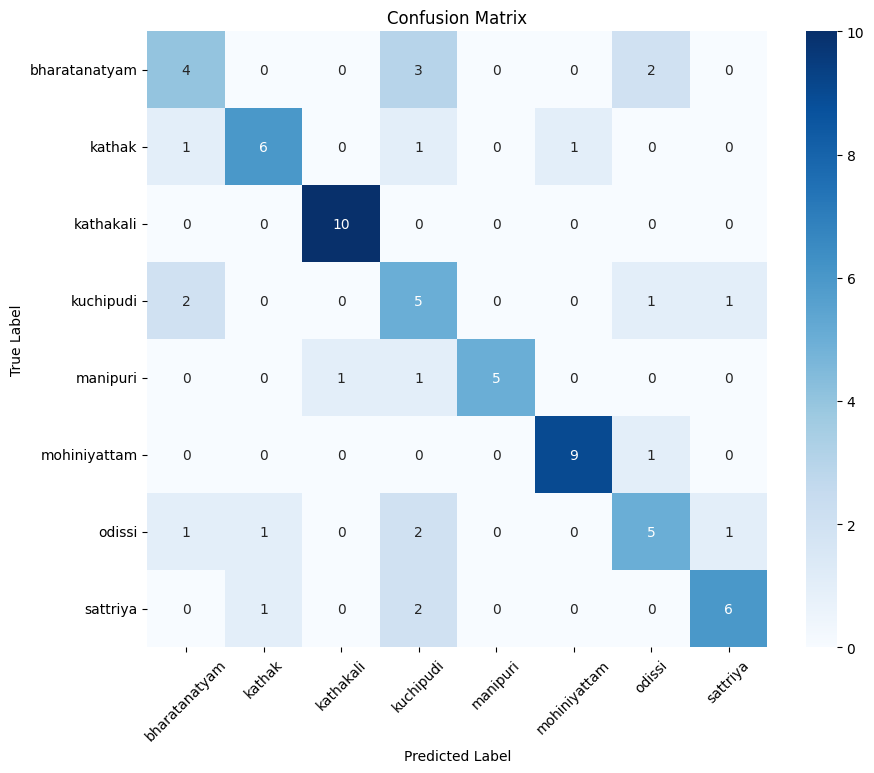


Classification Report:

               precision    recall  f1-score   support

bharatanatyam       0.50      0.44      0.47         9
       kathak       0.75      0.67      0.71         9
    kathakali       0.91      1.00      0.95        10
    kuchipudi       0.36      0.56      0.43         9
     manipuri       1.00      0.71      0.83         7
 mohiniyattam       0.90      0.90      0.90        10
       odissi       0.56      0.50      0.53        10
     sattriya       0.75      0.67      0.71         9

     accuracy                           0.68        73
    macro avg       0.72      0.68      0.69        73
 weighted avg       0.71      0.68      0.69        73



In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on validation set
val_preds = model.predict(X_val)
val_pred_classes = np.argmax(val_preds, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(y_val_classes, val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys(), cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val_classes, val_pred_classes, target_names=label_map.keys()))
